# MNIST DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST stands for Modified National Institute of Standards and Technology, which is a dataset of handwritten digits used for training and testing image processing systems.


The MNIST dataset is a collection of 70,000 handwritten digits (0-9) images, with 60,000 images for training and 10,000 images for testing. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding digit class. The MNIST dataset is commonly used as a benchmark dataset for image classification tasks in machine learning and computer vision.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

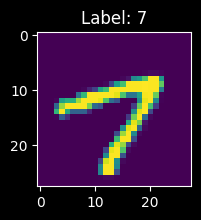

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN


In [10]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-11 21:10:16.369311: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-11 21:10:16.369352: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-11 21:10:16.369371: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-11 21:10:16.369903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-11 21:10:16.370297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
ann.layers

In [12]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
optimizer = Adam()
epochs = 5
ann.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [14]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_ann",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/mnist_ann_logs.csv")
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/5


2023-08-11 21:10:18.000192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - ETA: 0s - loss: 0.4009 - sparse_categorical_accuracy: 0.8853

2023-08-11 21:10:26.896486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


750/750 [==============================] - 11s 13ms/step - loss: 0.4009 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.2911 - val_sparse_categorical_accuracy: 0.9191
Epoch 2/5
748/750 [============================>.] - ETA: 0s - loss: 0.3028 - sparse_categorical_accuracy: 0.9161INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/mnist_ann/assets


750/750 [==============================] - 8s 11ms/step - loss: 0.3033 - sparse_categorical_accuracy: 0.9161 - val_loss: 0.2777 - val_sparse_categorical_accuracy: 0.9229
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - loss: 0.2945 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.2832 - val_sparse_categorical_accuracy: 0.9232
Epoch 4/5
750/750 [==============================] - 7s 10ms/step - loss: 0.2950 - sparse_categorical_accuracy: 0.9175 - val_loss: 0.2933 - val_sparse_categorical_accuracy: 0.9221
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 0.2963 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.2942 - val_sparse_categorical_accuracy: 0.9194


In [15]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.31798754930496215
Validation loss: 0.28790335059165956
0.910742 Training accuracy with a standard deviation of 0.012737
0.921333 Validation accuracy with a standard deviation of 0.001742


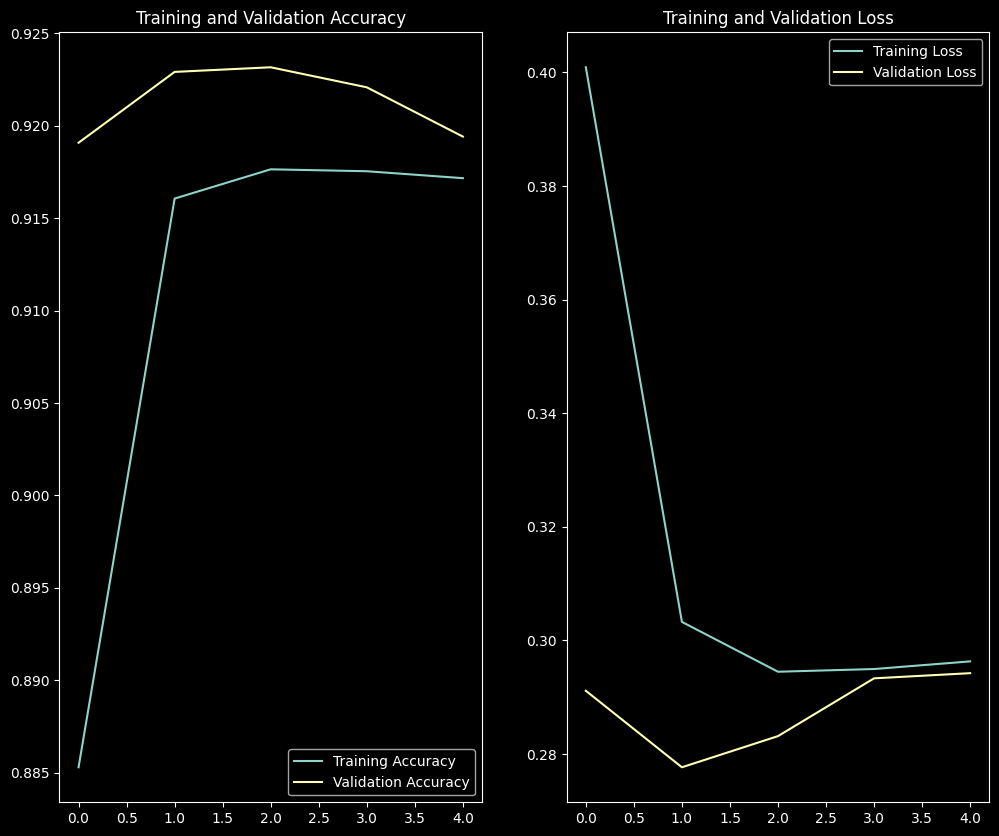

In [16]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_ann_acc_loss.png", bbox_inches="tight")

In [17]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3075 - sparse_categorical_accuracy: 0.9123
Test loss: 0.3075231909751892
Test accuracy: 0.9122999906539917


In [18]:
y_pred = ann.predict(X_test)

 86/313 [=======>......................] - ETA: 0s

2023-08-11 21:11:01.145237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


## CNN


In [19]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_1"),
        Conv2D(
            filters=64,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            name="conv_layer_2",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [20]:
cnn.layers

In [21]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 pooling_layer_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_layer (Flatten)     (None, 3136)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               401536  

In [22]:
cnn.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [23]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_cnn",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5


2023-08-11 21:11:03.734589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


748/750 [============================>.] - ETA: 0s - loss: 0.1357 - sparse_categorical_accuracy: 0.9572

2023-08-11 21:11:18.563508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


750/750 [==============================] - 17s 22ms/step - loss: 0.1354 - sparse_categorical_accuracy: 0.9572 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9835
Epoch 2/5
748/750 [============================>.] - ETA: 0s - loss: 0.0504 - sparse_categorical_accuracy: 0.9844INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/mnist_cnn/assets


750/750 [==============================] - 14s 19ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0504 - val_sparse_categorical_accuracy: 0.9864
Epoch 3/5
750/750 [==============================] - 13s 17ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0549 - val_sparse_categorical_accuracy: 0.9848
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0661 - val_sparse_categorical_accuracy: 0.9862
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9838


In [24]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.06515235528349876
Validation loss: 0.0667811669409275
0.981092 Training accuracy with a standard deviation of 0.012014
0.984950 Validation accuracy with a standard deviation of 0.001183


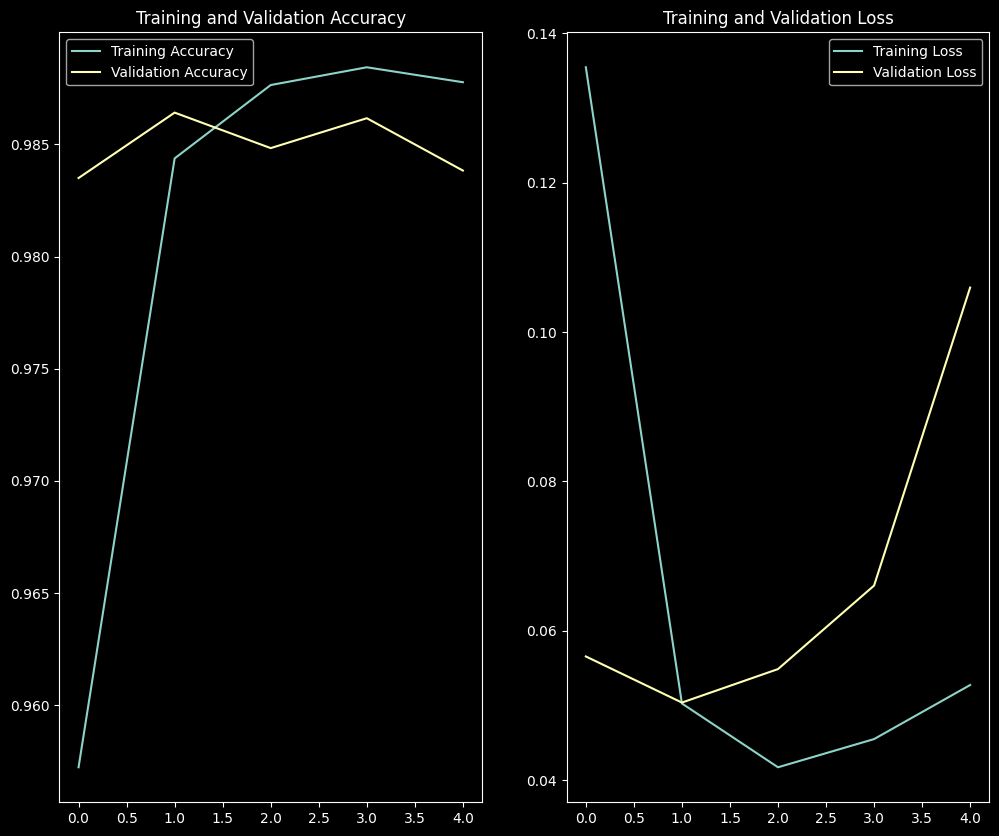

In [25]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_cnn_acc_loss.png", bbox_inches="tight")

In [26]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9837
Test loss: 0.09499072283506393
Test accuracy: 0.9836999773979187


In [27]:
y_pred = cnn.predict(X_test)

 42/313 [===>..........................] - ETA: 1s

2023-08-11 21:12:12.911654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step
